# **Problem Statement**

- **Have you ever wondered when the best time of year to book a hotel room is?**
- **Or the optimal length of stay in order to get the best daily rate?**
- **What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

This hotel booking dataset can help you explore those questions. This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

# **Define the Business Objective?**
**Explore and Analyze the data to discover important factors that governs the bookings.**

# **Project**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Exploring Data

In [2]:
# Load Dataset into DataFrame
data = pd.read_csv(r"C:\Users\cereb\OneDrive\Documents\Rishabh\Projects\Hotel Reservation\Data\Raw\hotel_bookings(in).csv")

# Create a backup of the Dataframe
data_original = data.copy()

# Showcase the Total Number of Rows and COlumns in the Data
print("-"*60)
print(f"Total Rows in Dataset :{data.shape[0]}")
print(f"Total Columns in Dataset :{data.shape[1]}")
print("-"*60)


print("Basic column information:")
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

data.head()

------------------------------------------------------------
Total Rows in Dataset :119390
Total Columns in Dataset :32
------------------------------------------------------------
Basic column information:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
# Get unique values for categorical columns, excluding specified columns
columns = data.columns.tolist()
columns_to_exclude = ["lead_time", "arrival_date_week_number", "arrival_date_day_of_month",
                        "stays_in_weekend_nights", "stays_in_week_nights", "previous_bookings_not_canceled",
                        "agent", "company", "days_in_waiting_list", "adr", "reservation_status_date"]

# Remove specified columns from the list if they exist
for col in columns_to_exclude:
      columns.remove(col)
    
print("-" * 60)
for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("-" * 30)
print("-" * 60)

------------------------------------------------------------
Unique values for column 'hotel':
['Resort Hotel' 'City Hotel']
------------------------------
Unique values for column 'is_canceled':
[0 1]
------------------------------
Unique values for column 'arrival_date_year':
[2015 2016 2017]
------------------------------
Unique values for column 'arrival_date_month':
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------
Unique values for column 'adults':
[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
------------------------------
Unique values for column 'children':
[ 0.  1.  2. 10.  3. nan]
------------------------------
Unique values for column 'babies':
[ 0  1  2 10  9]
------------------------------
Unique values for column 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------
Unique values for column 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'A

In [4]:
# Understand the Data Structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Cleaning

In [5]:
# Check for specific string representations of missing values
missing_values_strings = ["nan", "na", "null"]

print("-"*60)
for col in data.columns:
    # Check if any of the missing value strings are present in the column (case-insensitive)
    has_missing_strings = data[col].astype(str).str.lower().isin(missing_values_strings).any()
    if has_missing_strings:
        print(f"Column '{col}' contains one or more of the specified missing value strings.")
print("-"*60)

------------------------------------------------------------
Column 'children' contains one or more of the specified missing value strings.
Column 'country' contains one or more of the specified missing value strings.
Column 'agent' contains one or more of the specified missing value strings.
Column 'company' contains one or more of the specified missing value strings.
------------------------------------------------------------


***"Let's fiind the number of Null values along with the percentage of NULL values in each columns to determine the cleaning process either to drop the NULL Entries or Fill it up."***

In [6]:
# Count missing values in the specified columns
columns_to_check = ['children', 'country', 'agent', 'company']
missing_counts = data[columns_to_check].isnull().sum()
null_count_perc = (missing_counts / len(data)) * 100
null_summary = pd.DataFrame({"Null Count" : missing_counts, "Null Percentage" : null_count_perc.round(2)})

print("-" * 60)
print("Missing value counts for the specified columns:")
print(null_summary)
print("-" * 60)

------------------------------------------------------------
Missing value counts for the specified columns:
          Null Count  Null Percentage
children           4             0.00
country          488             0.41
agent          16340            13.69
company       112593            94.31
------------------------------------------------------------


In [7]:
# First lets drop the null entries of children and country
clean_data = data.copy()
clean_data = clean_data.dropna(subset=["children","country"])
clean_data = clean_data.fillna({"agent":data["agent"].mean(), "company": data["company"].mean()})

# Calculating the Null Values in Data along with its Percentage
null_count = clean_data.isnull().sum()
null_count_perc = (null_count / len(clean_data)) * 100

# Summaries in single Dataframe for side by side comparision
null_summary = pd.DataFrame({"Null Count" : null_count, "Null Percentage" : null_count_perc.round(2)})

# Printout the Results
print("-"*60)
print(null_summary)
print("-"*60)                                            

------------------------------------------------------------
                                Null Count  Null Percentage
hotel                                    0              0.0
is_canceled                              0              0.0
lead_time                                0              0.0
arrival_date_year                        0              0.0
arrival_date_month                       0              0.0
arrival_date_week_number                 0              0.0
arrival_date_day_of_month                0              0.0
stays_in_weekend_nights                  0              0.0
stays_in_week_nights                     0              0.0
adults                                   0              0.0
children                                 0              0.0
babies                                   0              0.0
meal                                     0              0.0
country                                  0              0.0
market_segment                         

**Great!, Now there are no missing values that can effect our data so we can continue further by  Spliting the Data into categorical and numeric Data.**
- *Also as we can see above the reservation_status_date have a incorrect datatype let's fix it along the way*
- *Before anything We have to check if the dataset have any duplicate values?*

In [8]:
# Check for duplicate values in each column and count them
duplicate_values = clean_data[clean_data.duplicated()]

print('-'*60)
print(f"Total Count of Duplicated values are {len(duplicate_values)}")
print('-'*60)

------------------------------------------------------------
Total Count of Duplicated values are 31958
------------------------------------------------------------


## Data Manipulation

In [9]:
# Creating a backup of the cleaned Data
clean_data["reservation_status_date"] = pd.to_datetime(clean_data["reservation_status_date"])
df = clean_data.copy() 

# Let's Split the dataframe into categorical and numeric data
categorical_data = df.select_dtypes(include=["object","category"])
numeric_data = df.select_dtypes(include=["int64", "float64"])
categorical_data.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [10]:
numeric_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,86.693382,189.266735,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,86.693382,189.266735,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,86.693382,189.266735,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.000000,189.266735,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.000000,189.266735,0,98.0,0,1


In [11]:
# Let's add some final key features in the dataframe
df["total_stay"] = pd.to_numeric(df["stays_in_weekend_nights"]+ df["stays_in_week_nights"])
df["total_guest"] = pd.to_numeric(df["adults"] + df["children"] + df["babies"])

# Result
display(df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


**We can see there are couple of entries in total guest *(Total Number of adult + children + babies)* are 0. Which me in those entries there were no guest present.**

In [12]:
# Lets find the total count of non present guest entries
print(f"Total Count of Non-present Guest entries is {df[df["total_guest"]==0].shape[0]} guests")

Total Count of Non-present Guest entries is 170 guests


In [13]:
''' There are 170 entries non-present entries. 
    Which is quiet low compare to the entire data so we can just we can just drop this enties.'''

# Let's Drop the unneccesary guest entries
df = df[df["total_guest"] != 0]


# checking the final no of rows and columns
print('-'*60)
print(f"Final Row Count : {df.shape[0]}")
print(f"Final Row Count : {df.shape[1]}")
print('-'*60)

------------------------------------------------------------
Final Row Count : 118728
Final Row Count : 34
------------------------------------------------------------


## Data Visulization

### Chart 1: Pie Chart for most Preferred Hotal

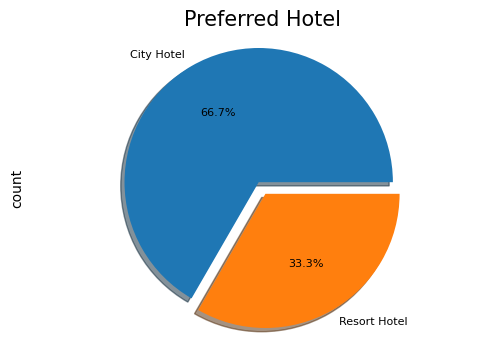

In [14]:
hotel_type = df['hotel'].value_counts()
hotel_type.plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=True, figsize=(6,4),fontsize=8)
plt.title('Preferred Hotel', fontsize= 15 )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Chart 2: Hotel type with highest adr (Average Daily Rate)

Text(0.5, 1.0, 'Average ADR of Hotel')

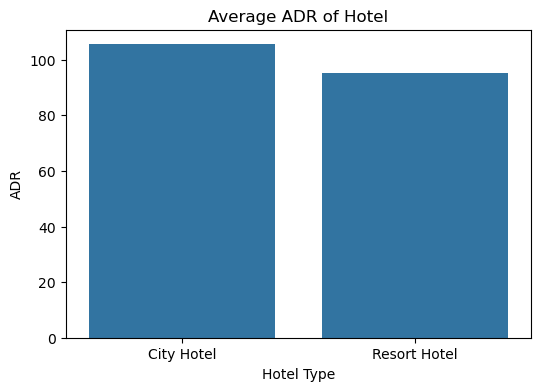

In [15]:
# group by hotel
hotel_group = df.groupby("hotel")

# grouping by hotel adr
highest_adr = hotel_group['adr'].mean().reset_index()

# Set plot size
plt.figure(figsize=(6,4))

# plot graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

# set labels
plt.xlabel("Hotel Type")
plt.ylabel("ADR")
plt.title("Average ADR of Hotel")

### Chart 3: Hotel type with highest adr (Average Daily Rate)

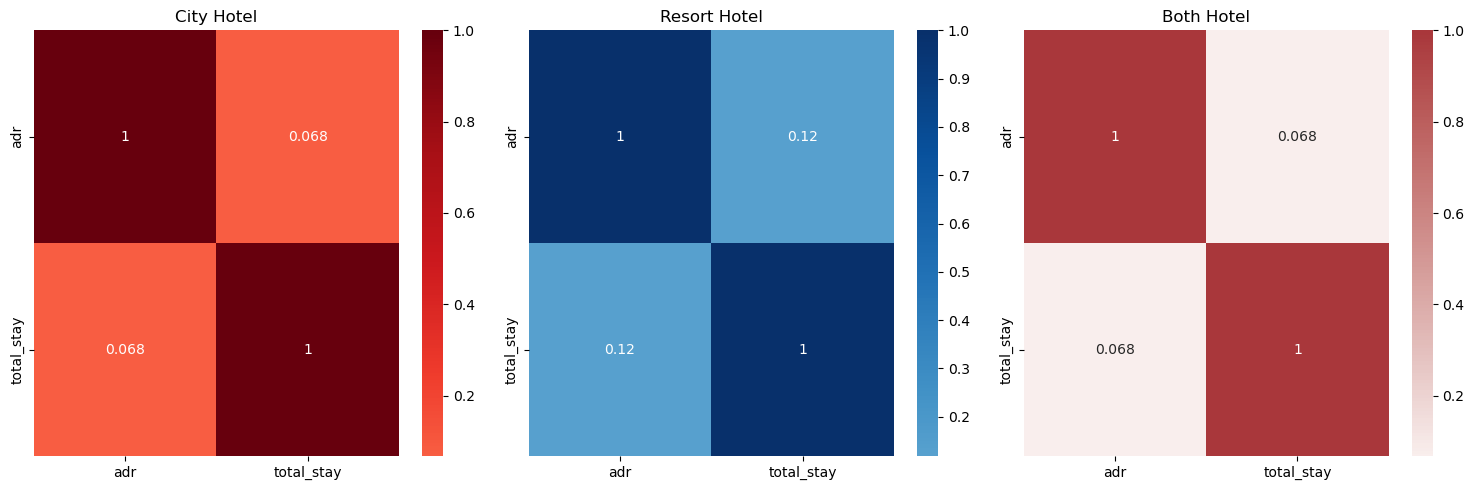

In [16]:
# Filter the data
city_data = df[df['hotel'] == 'City Hotel']
resort_data = df[df['hotel'] == 'Resort Hotel']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Increased width for better spacing

# City hotel correlation heatmap
sns.heatmap(city_data[['adr', 'total_stay']].corr(), annot=True, cmap='Reds', center=0, ax=axes[0])
axes[0].set_title('City Hotel')

# Resort hotel correlation heatmap
sns.heatmap(resort_data[['adr', 'total_stay']].corr(), annot=True, cmap='Blues', center=0, ax=axes[1])
axes[1].set_title('Resort Hotel')

# Both hotel correlation heatmap
sns.heatmap(df[['adr', 'total_stay']].corr(), annot=True, cmap='vlag', center=0, ax=axes[2])
axes[2].set_title('Both Hotel')  # Fixed: set_title instead of set.title

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Relationship between ADR and total_stay')

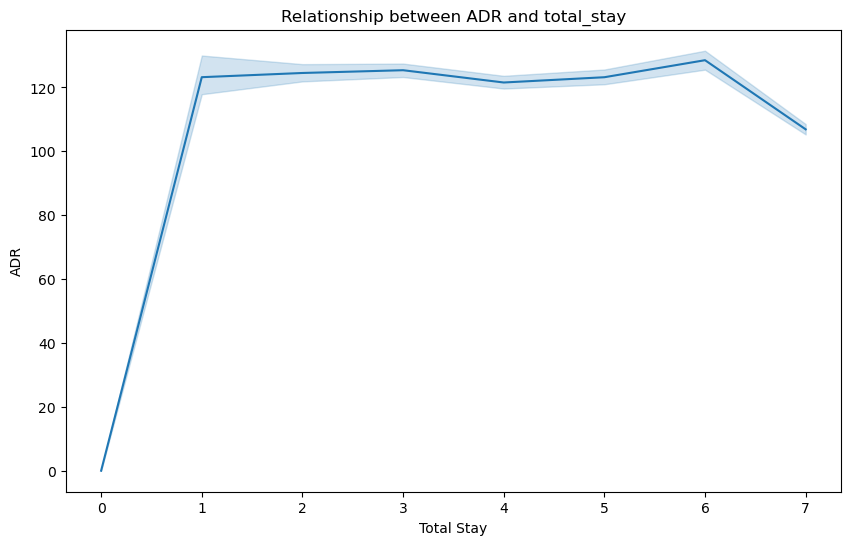

In [17]:
#Groupby total_stay,adr,hotel
adr_vs_stay = df.groupby(['total_stay','adr','hotel']).agg('count').reset_index ()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay = adr_vs_stay[:18000]

#plotting the graph in linechart
plt.figure(figsize=(10,6))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.xlabel('Total Stay')
plt.ylabel('ADR')
plt.title('Relationship between ADR and total_stay')

### Chart 4: Percentage of repeated guests  

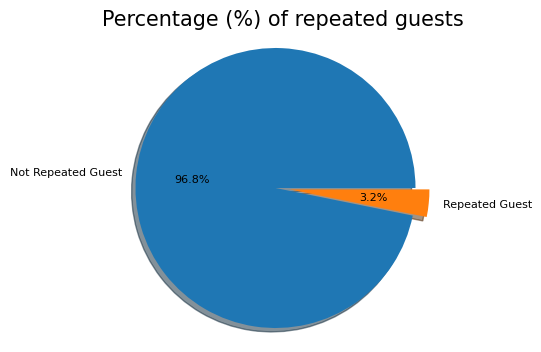

In [18]:
# Map the values in 'is_repeated_guest' to descriptive labels
repeated_guest_labels = {0: 'Not Repeated Guest', 1: 'Repeated Guest'}
repeated_guest_counts = df['is_repeated_guest'].map(repeated_guest_labels).value_counts()

# Plot the pie chart with updated labels
repeated_guest_counts.plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=True, figsize=(6,4),fontsize=8, labels=repeated_guest_counts.index)

plt.title('Percentage (%) of repeated guests', fontsize= 15)
plt.ylabel('') # Remove the default 'count' label on the y-axis
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Chart 5: Meal type Distribution  

In [19]:
print("-"*30)
print(f"Total Undefined Meal Type is {df[df['meal']== "undefined"].shape[0]}")
print("-"*30)

------------------------------
Total Undefined Meal Type is 0
------------------------------


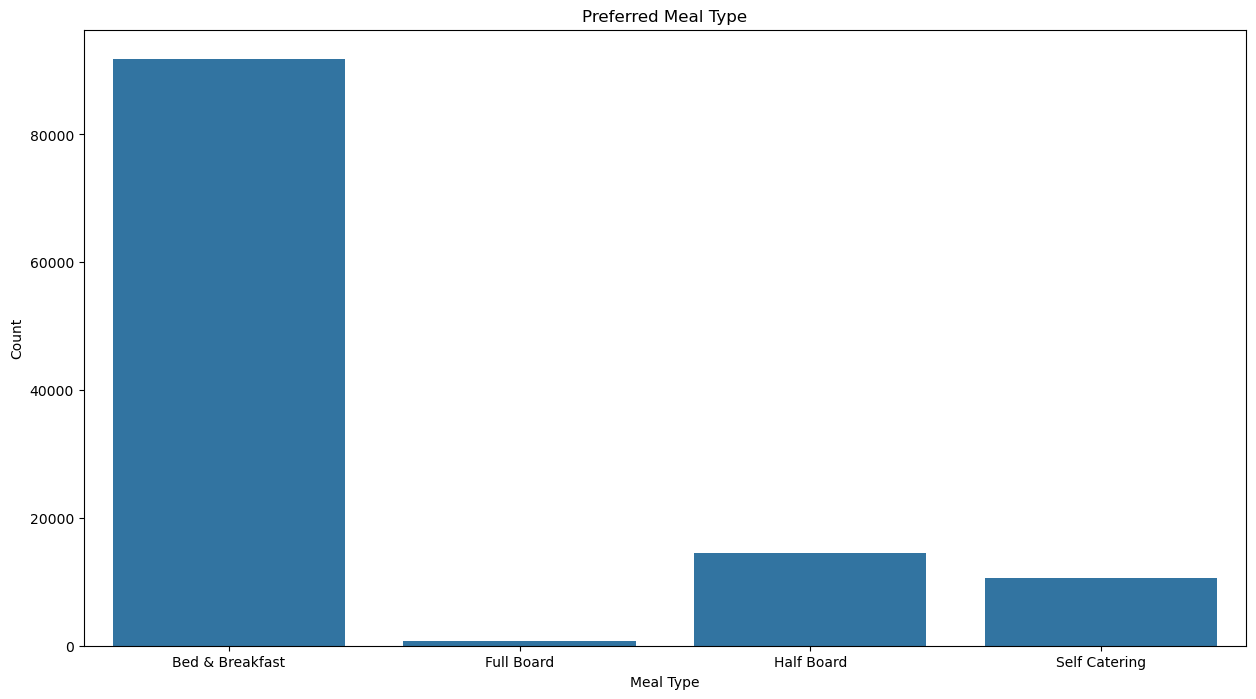

In [20]:
# Removing Uneccessary Meal Type "Undefined"
clean_df = df[df['meal'] != "Undefined"].copy()

# Map meal type abbreviations to full descriptions
meal_labels = {'BB': 'Bed & Breakfast', 'FB': 'Full Board', 'HB': 'Half Board', 'SC': 'Self Catering'}
clean_df['meal_description'] = clean_df['meal'].map(meal_labels)

# Ploting
plt.figure(figsize=(15,8))
sns.countplot(x=clean_df['meal_description'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title('Preferred Meal Type')
plt.show()

### Chart 6: Percentage distribution of required_car_parking_spaces  

------------------------------------------------------------
Total Custoemrs Required 0 Car Parking Space are 111425.
Total Custoemrs Required 1 Car Parking Space are 7270.
Total Custoemrs Required 2 Car Parking Spaces are 28.
Total Custoemrs Required 3 Car Parking Spaces are 3.
Total Custoemrs Required 8 Car Parking Spaces are 2.
------------------------------------------------------------


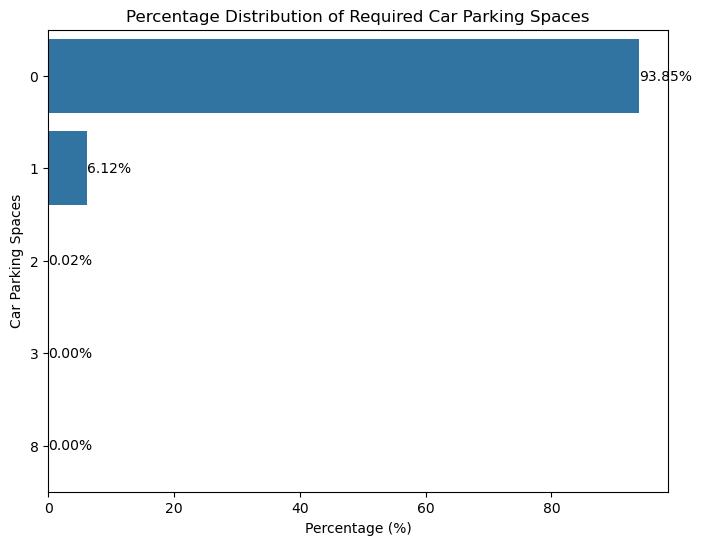

In [21]:
# Print the Total of each unique values in required_car_parking_spaces (0,1,2,3,8)
print('-'*60)
print(f"Total Custoemrs Required 0 Car Parking Space are {len(df[df['required_car_parking_spaces']==0])}.")
print(f"Total Custoemrs Required 1 Car Parking Space are {len(df[df['required_car_parking_spaces']==1])}.")
print(f"Total Custoemrs Required 2 Car Parking Spaces are {len(df[df['required_car_parking_spaces']==2])}.")
print(f"Total Custoemrs Required 3 Car Parking Spaces are {len(df[df['required_car_parking_spaces']==3])}.")
print(f"Total Custoemrs Required 8 Car Parking Spaces are {len(df[df['required_car_parking_spaces']==8])}.")
print('-'*60)

# Calculate the percentage of each value
parking_percentages = df['required_car_parking_spaces'].value_counts(normalize=True) * 100

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=parking_percentages.values, y=parking_percentages.index, orient='h')

# Add percentage labels next to each bar
ax.bar_label(ax.containers[0], fmt='%.2f%%')

plt.xlabel('Percentage (%)')
plt.ylabel('Car Parking Spaces')
plt.title('Percentage Distribution of Required Car Parking Spaces')
plt.show()

### Chart 7: MultiBar chart for mostly used Distribution Channel and Relationship Channel and adr  

Text(0.5, 1.0, 'ADR across Distribution Channel')

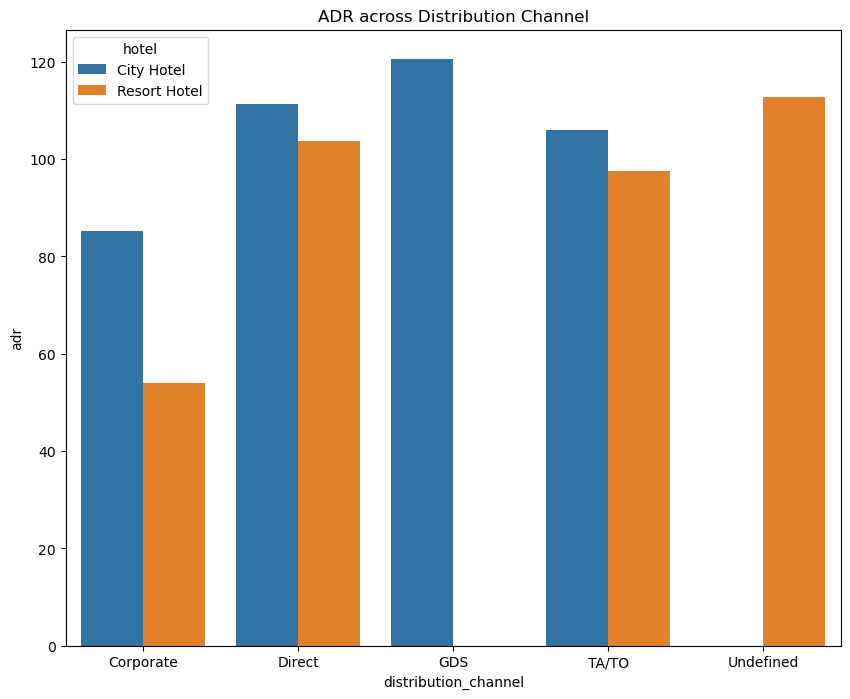

In [22]:
#using group by on distribution channel and hotel
distribution_channel_df = df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

#set plot size and plot barchart
plt.figure(figsize=(10,8))
sns.barplot(x='distribution_channel',y='adr',data=distribution_channel_df,hue='hotel')
plt.title('ADR across Distribution Channel')

### Chart 8: Bookings by month and optimal stay length in hotels 

Text(0.5, 1.0, 'Bookings across each month')

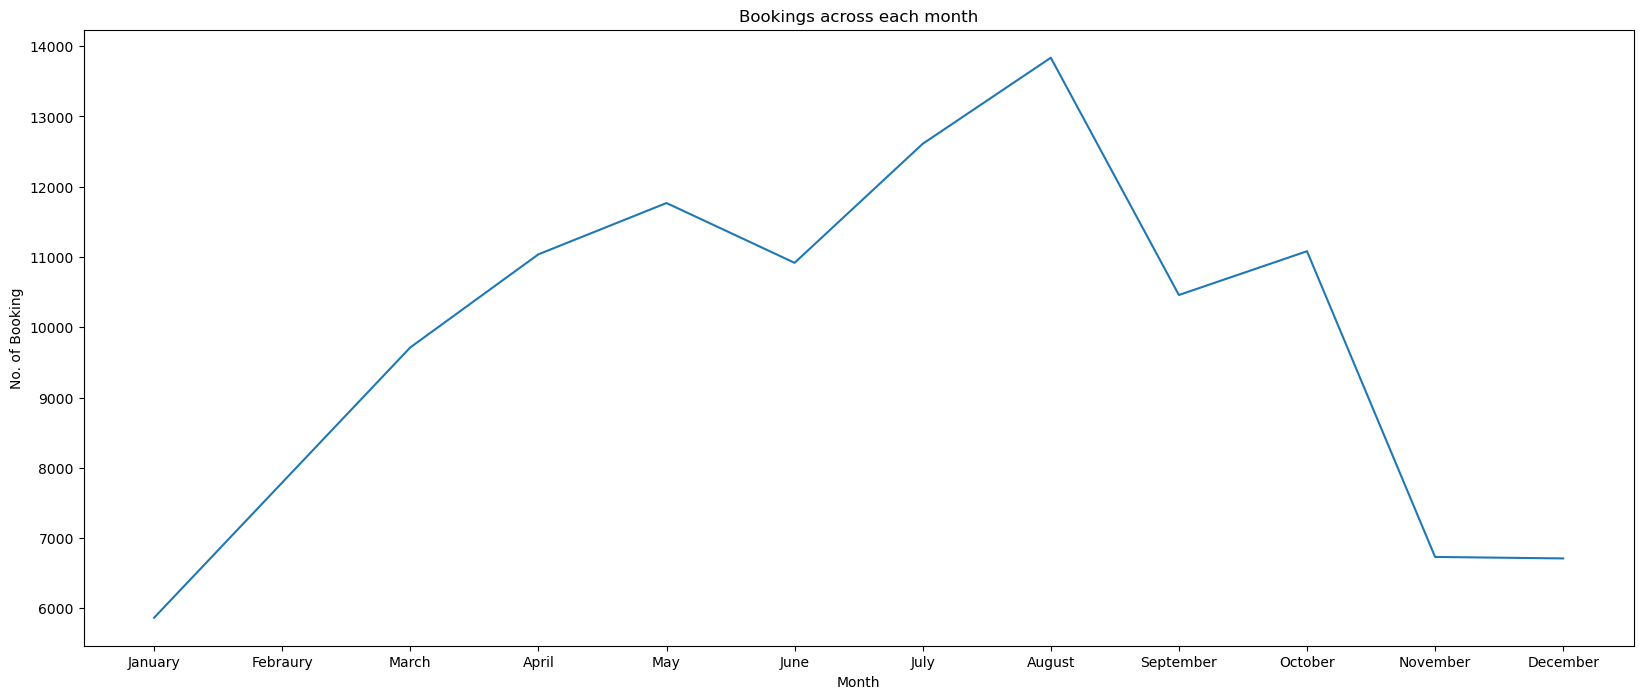

In [23]:
#Groupby total_stay,adr,hotel
bookings_by_months = df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
months = ['January','Febraury','March','April','May','June','July','August','September','October','November','December']
bookings_by_months['arrival_date_month']=pd.Categorical(bookings_by_months['arrival_date_month'],categories=months,ordered=True)
bookings_by_months_df = bookings_by_months.sort_values('arrival_date_month')

#plotting the graph in linechart
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months['arrival_date_month'],y=bookings_by_months['Counts'])
plt.xlabel('Month')
plt.ylabel('No. of Booking')
plt.title('Bookings across each month')

Text(0.5, 1.0, 'Optimal stay length in both hotel types')

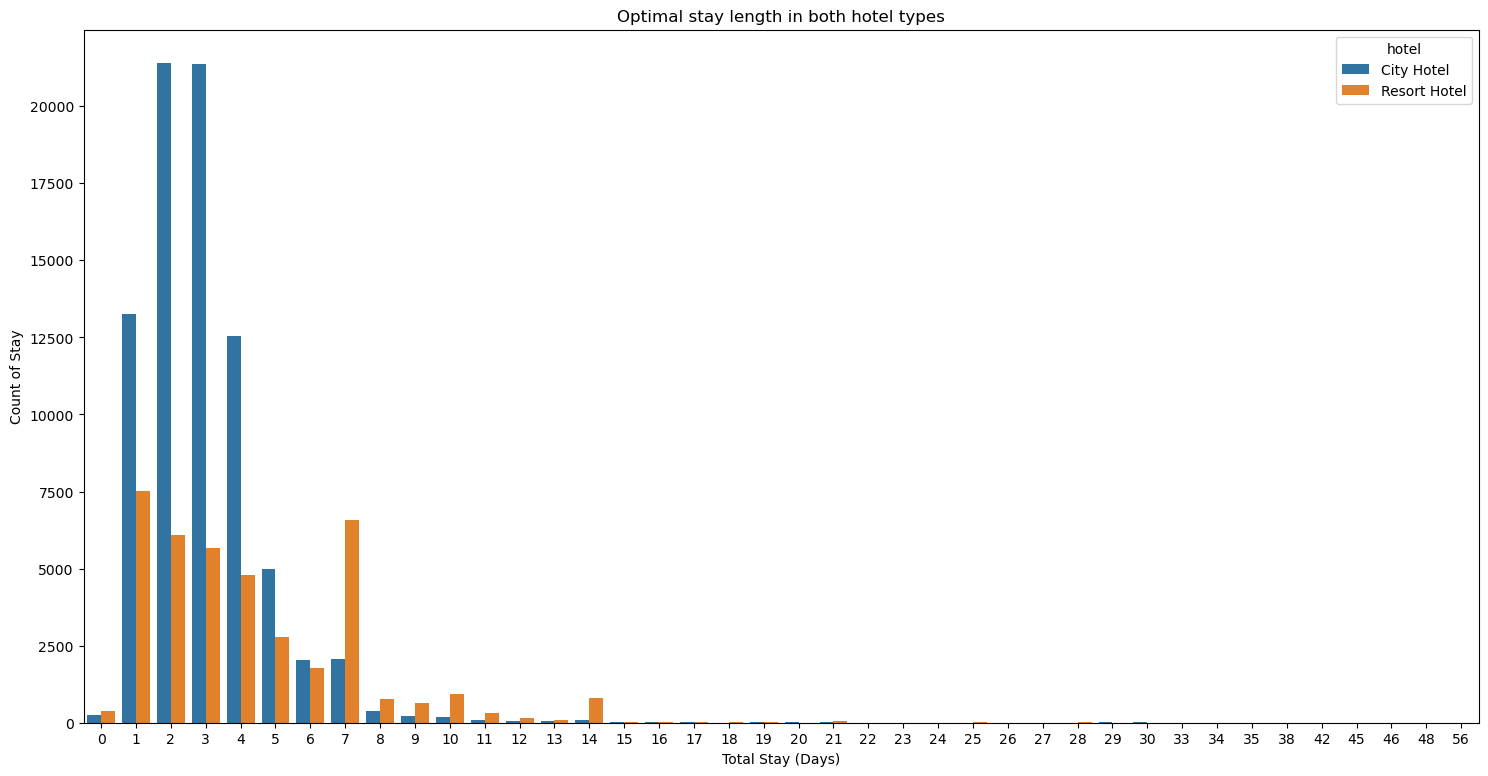

In [24]:
#using groupby function on total stay and hotel
stay = df.groupby(['total_stay','hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})

# Plot
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)
plt.xlabel('Total Stay (Days)')
plt.ylabel('Count of Stay')
plt.title('Optimal stay length in both hotel types')

### Chart 9: Plotting Histogram 

<function matplotlib.pyplot.show(close=None, block=None)>

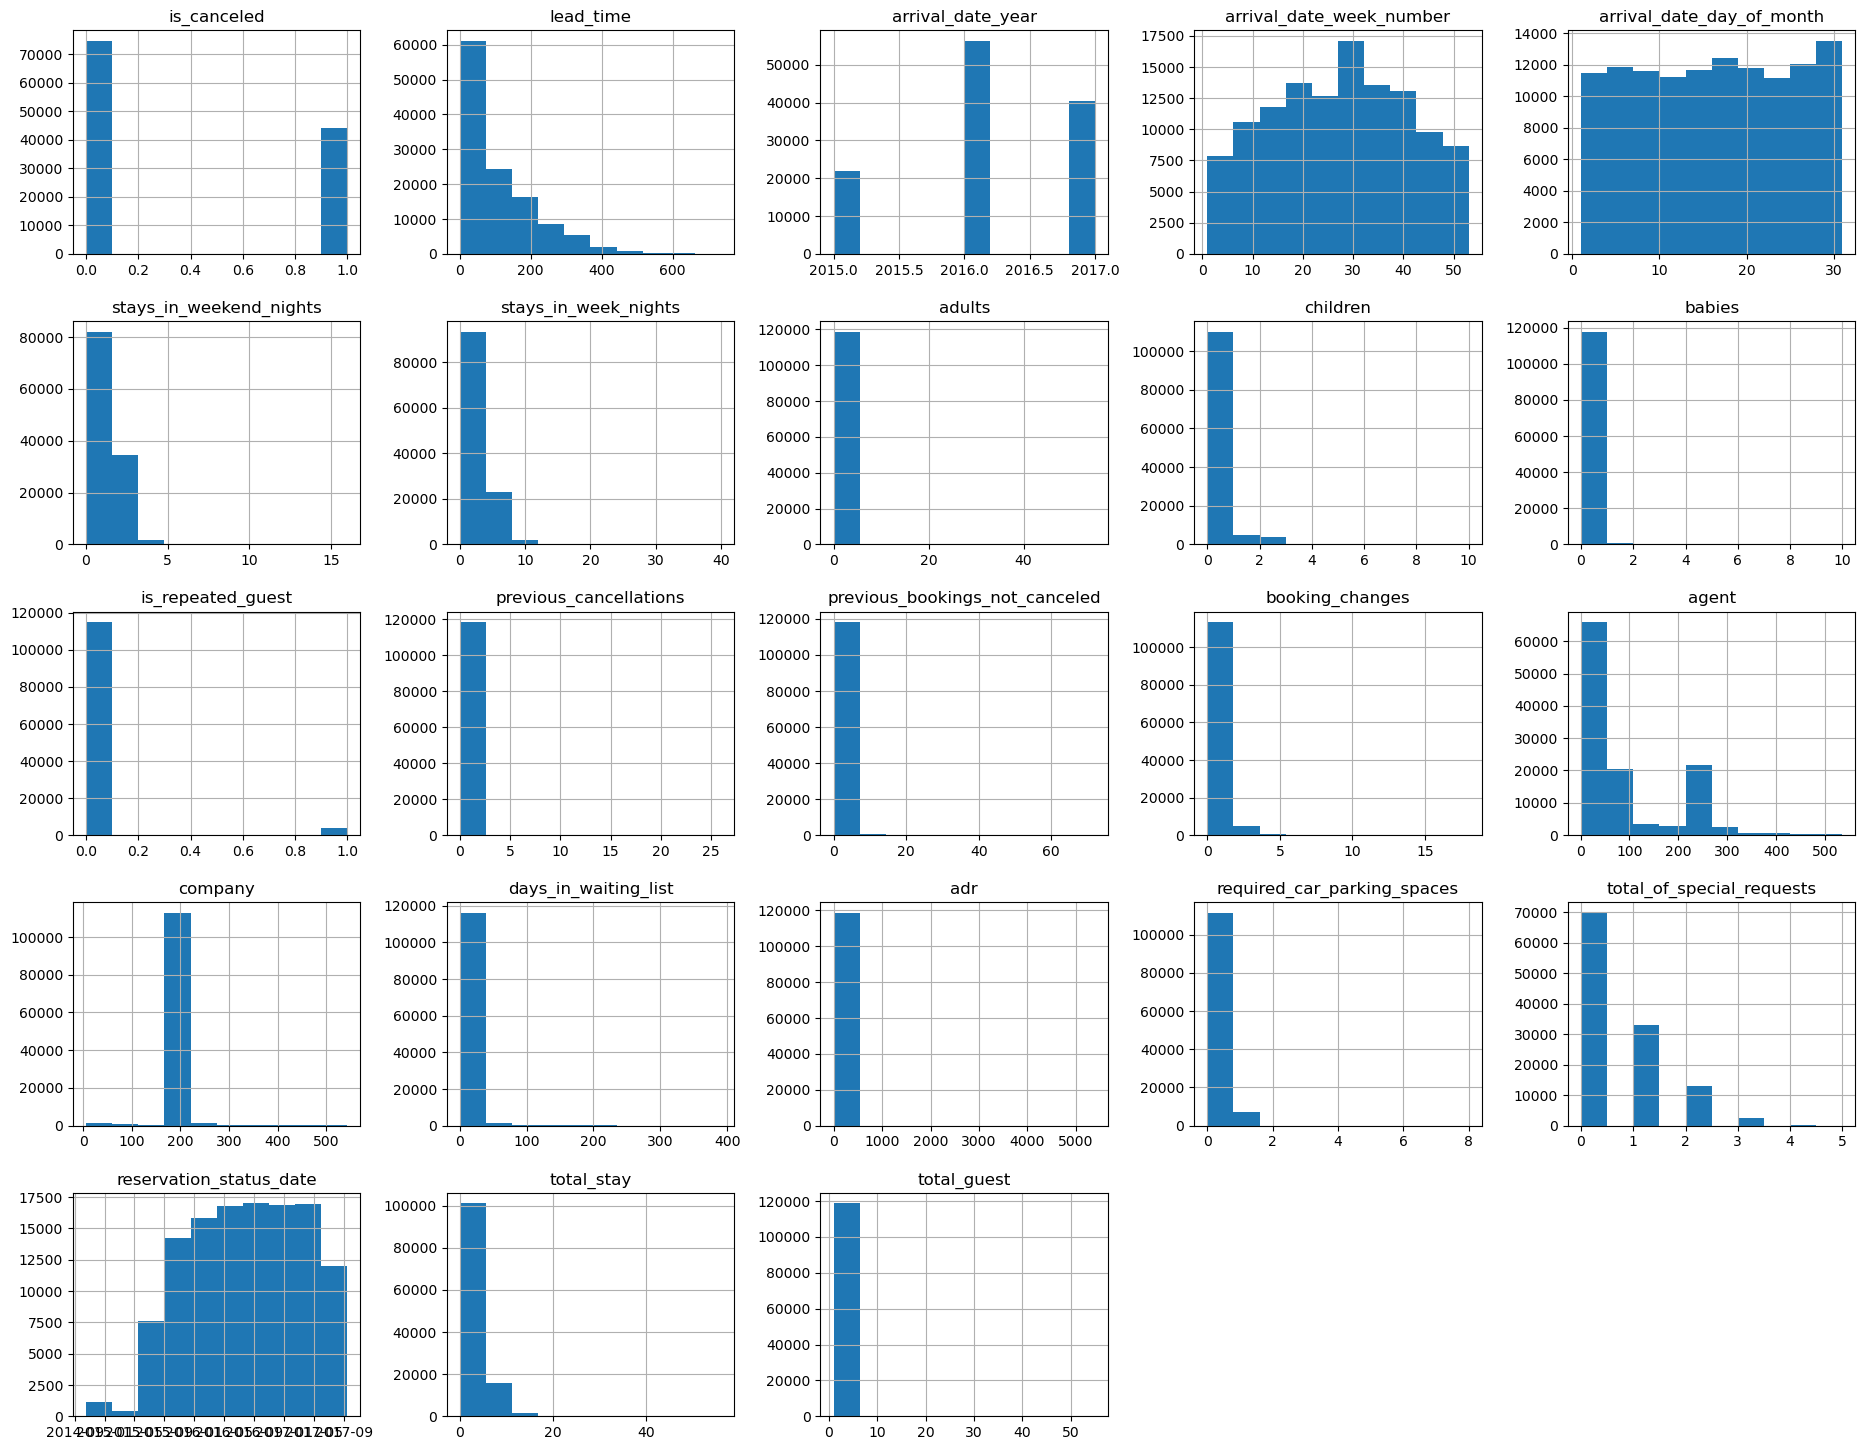

In [25]:
df.hist(figsize=(23,18))
plt.show

### Chart 10: Year and Hotel wise confirmed bookings and cancellation distribution

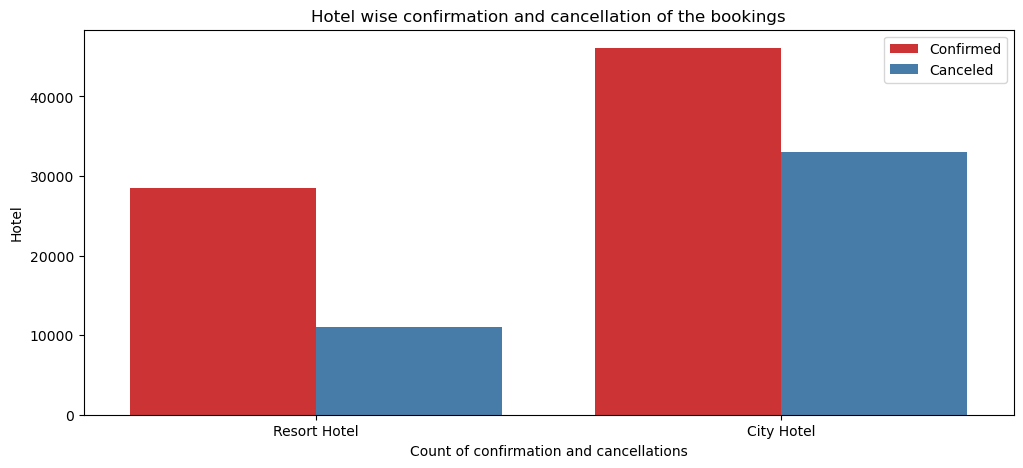

In [26]:
#plotting a count plot chart using seaborn for counts of confirmed and canceled bookings
plt.figure(figsize=(12,5))
sns.countplot(x='hotel',hue='is_canceled',palette='Set1',data=df)
plt.legend(['Confirmed','Canceled'])
plt.xlabel('Count of confirmation and cancellations')
plt.ylabel('Hotel')
plt.title('Hotel wise confirmation and cancellation of the bookings')
plt.show()

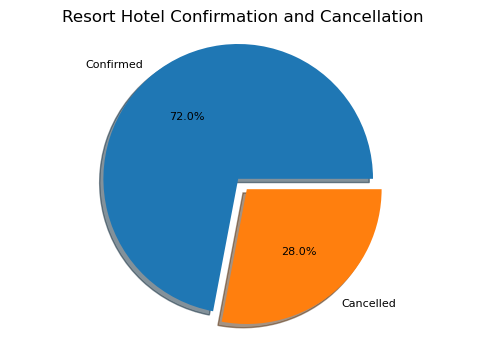

In [27]:
#plotting a pie chart using matplotlib for percentage of confirmed and canceled bookings of resort hotel
resort_hotel = df[df["hotel"] == "Resort Hotel"]
rh_checking_cancel = resort_hotel['is_canceled'].value_counts()

rh_checking_cancel.plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=True, figsize=(6,4), fontsize=8, labels=["Confirmed","Cancelled"])

plt.title('Resort Hotel Confirmation and Cancellation')
plt.ylabel('') # Remove the default 'count' label on the y-axis
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Text(0, 0.5, 'Number of bookings')

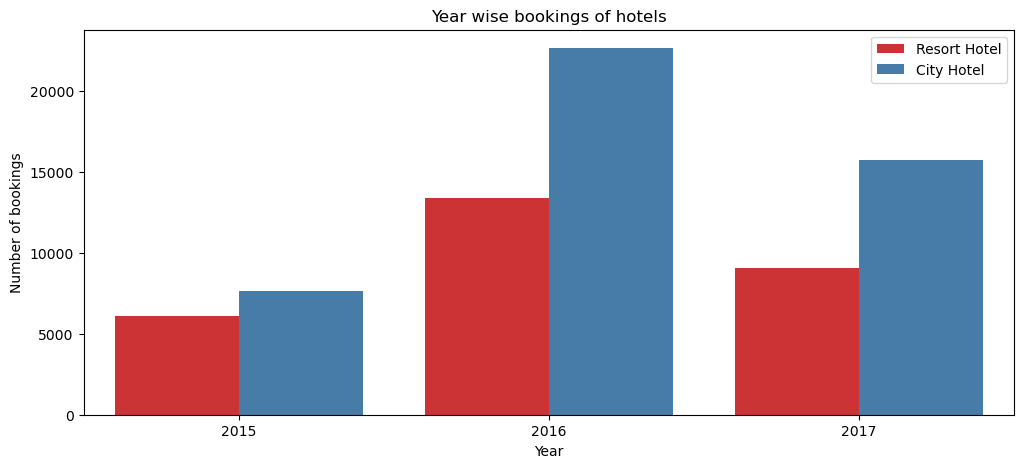

In [28]:
#removing the cancelled bookings from the data and creating a new dataframe
data_not_canceled = df[df['is_canceled']==0]

#year wise bookings of hotels
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year',hue='hotel',palette='Set1',data=data_not_canceled)
plt.legend(['Resort Hotel','City Hotel'])
plt.title("Year wise bookings of hotels")
plt.xlabel("Year")
plt.ylabel("Number of bookings")

### Chart 11: ADR across different months

Text(0.5, 1.0, 'ADR across each month')

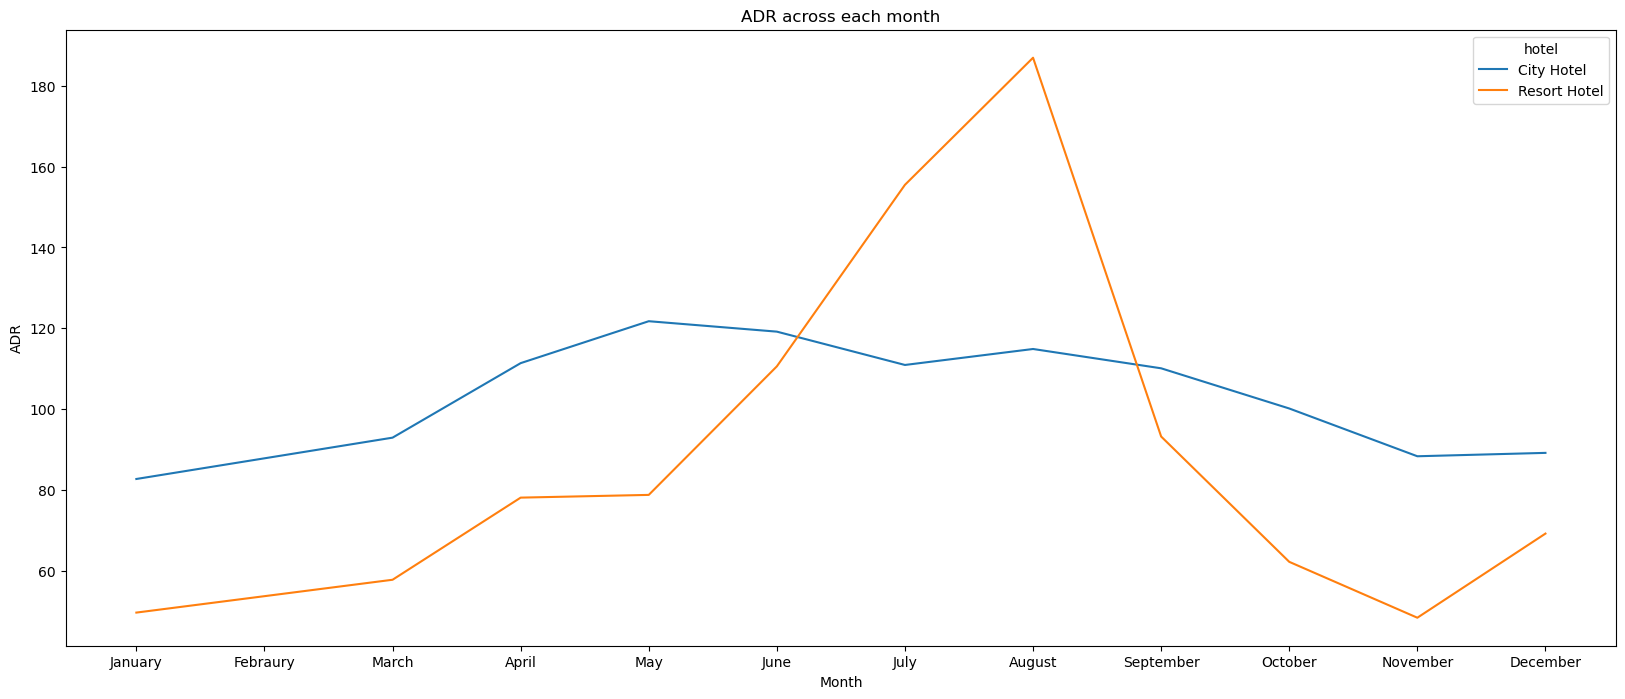

In [29]:
#Groupby total_stay,adr,hotel
bookings_by_month = df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
bookings_by_month['arrival_date_month']=pd.Categorical(bookings_by_month['arrival_date_month'],categories=months,ordered=True)
bookings_by_month = bookings_by_month.sort_values('arrival_date_month')

#plotting the graph in linechart
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_month['arrival_date_month'],y=bookings_by_month['adr'],hue=bookings_by_month['hotel'])
plt.xlabel('Month')
plt.ylabel('ADR')
plt.title('ADR across each month')

### Chart 12: Weekly stay distribution and calculation of cancellation and non-cancellation

Text(0, 0.5, 'Number of stays')

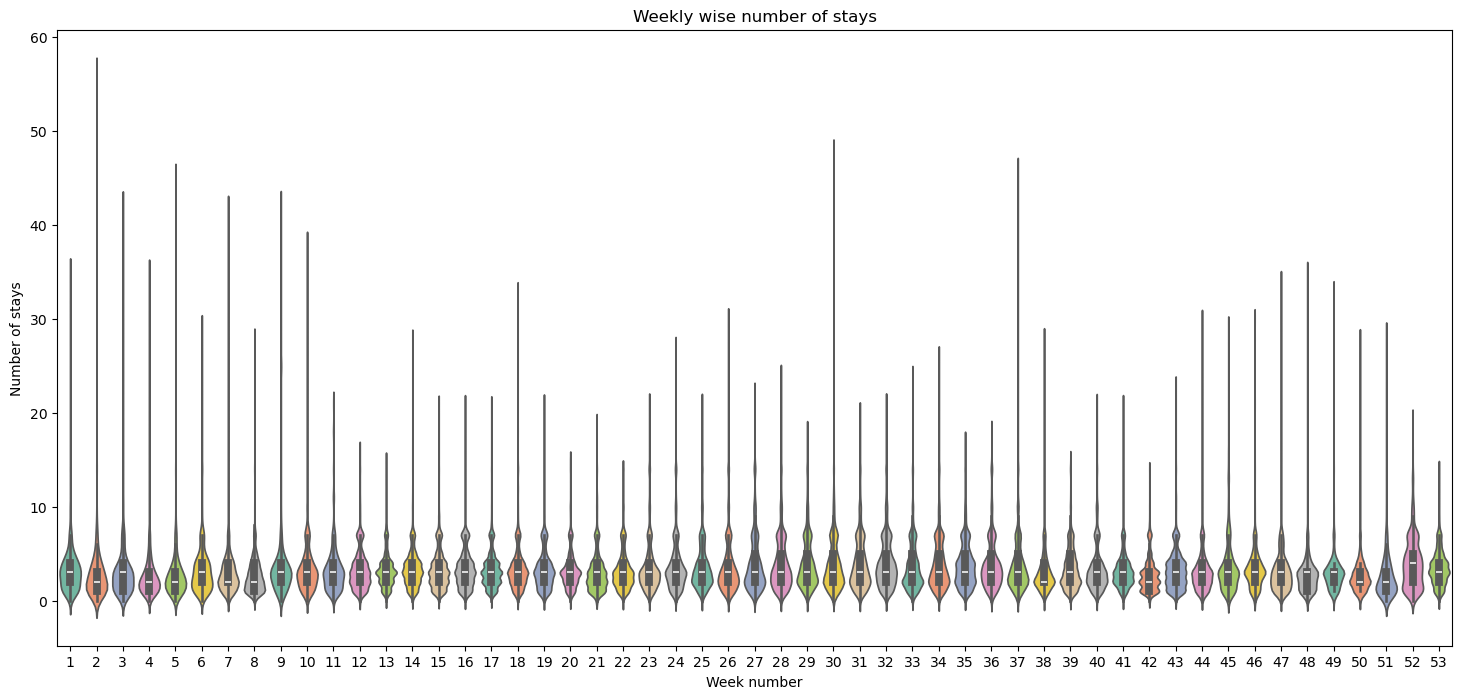

In [30]:
#using a violin plot to know in which weeks,visitors stays the most
plt.figure(figsize=(18,8))
sns.violinplot(x="arrival_date_week_number",y="total_stay",palette="Set2",data=df)
plt.title("Weekly wise number of stays")
plt.xlabel("Week number")
plt.ylabel("Number of stays")

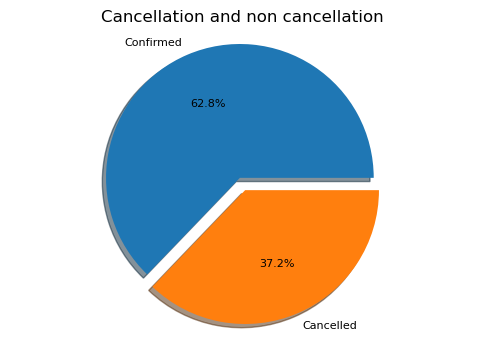

In [31]:
df['is_canceled'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',shadow=True, figsize=(6,4), fontsize=8, labels=["Confirmed","Cancelled"])
plt.ylabel("")
plt.axis("equal")
plt.title("Cancellation and non cancellation")
plt.show()

### Chart 13: Room type preference and Customer types

Text(0.5, 1.0, 'Most preferred Room Type')

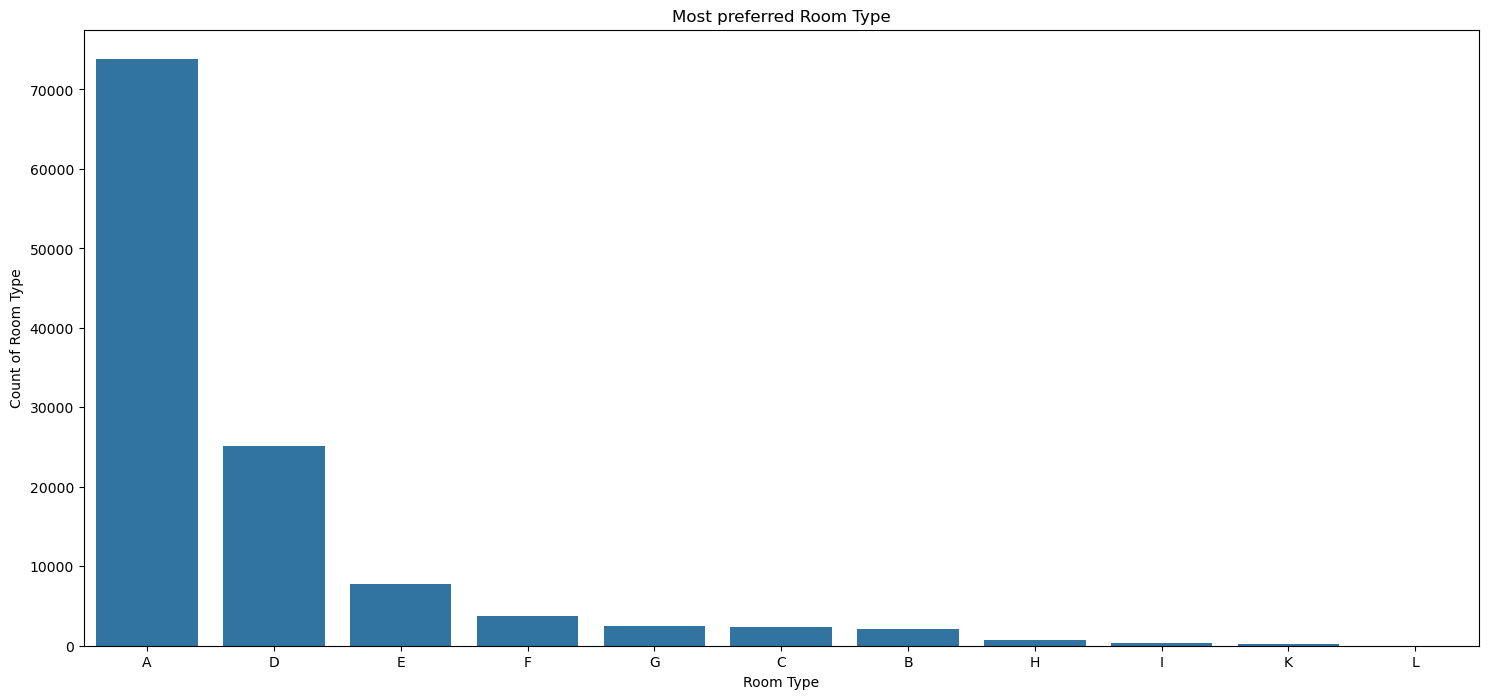

In [32]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
plt.xlabel('Room Type')
plt.ylabel('Count of Room Type')
plt.title('Most preferred Room Type')

Text(0, 0.5, 'Number of Customers')

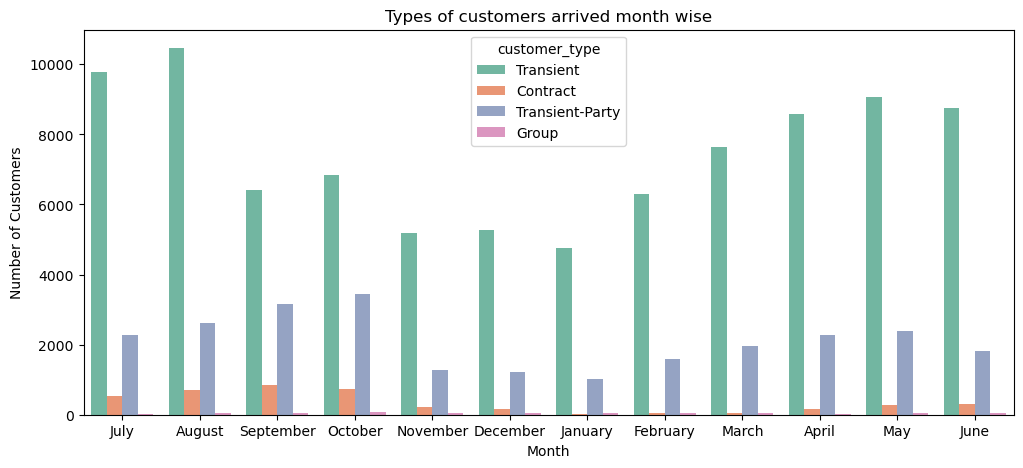

In [33]:
#using seaborn to plot a count to demonstrate the types of customers visit the most
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month',hue='customer_type',palette="Set2",data=df)
plt.title("Types of customers arrived month wise")
plt.xlabel("Month")
plt.ylabel("Number of Customers")

### Chart 14: Correlation Heatmap

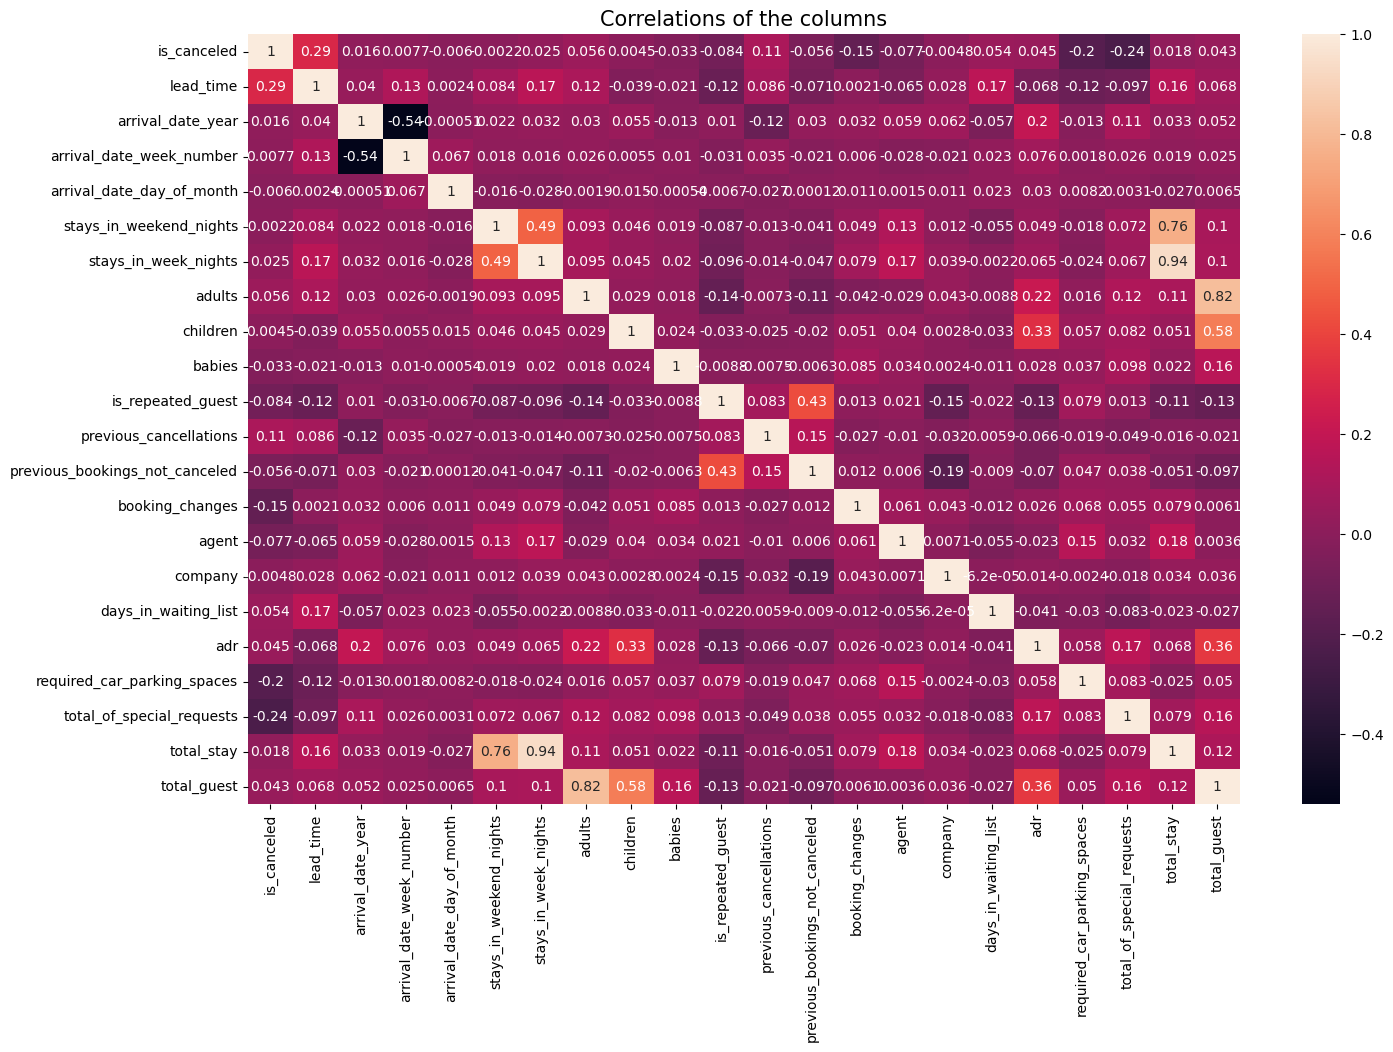

In [34]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlations of the columns',fontsize=15)
plt.show()

## Dataset Spliting and Creation

In [35]:
# Create a new Primary Key_id for Main Dataset with sequential integers as IDs
df['booking_id'] = range(1, len(df) + 1)
df.set_index('booking_id', inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_guest
booking_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


In [36]:
# Splitting Dataframe in 6 Datasets
# Central Dataset among splitted Dataset
fact_bookings = df[["lead_time", "reservation_status", "reservation_status_date", "deposit_type", "country", "days_in_waiting_list", "is_canceled", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "adr", "required_car_parking_spaces", "total_of_special_requests", "stays_in_weekend_nights", "stays_in_week_nights", "total_stay", "total_guest"]].copy()

# Foriegn Key hotel_id
hotel_id =[]
city_hotel_count = 0
resort_hotel_count = 0

for hotel_type in df['hotel']:
    if hotel_type == 'City Hotel':
        city_hotel_count += 1
        hotel_id.append(f'CH{city_hotel_count}')
    elif hotel_type == 'Resort Hotel':
        resort_hotel_count += 1
        hotel_id.append(f'RH{resort_hotel_count}')

fact_bookings['hotel_id'] = hotel_id

# Date  Foriegn Id
booking_date_id = [f"BD{i+1}" for i in range(len(df))]
fact_bookings["booking_date_id"] = booking_date_id

arrival_date_id = [f"AD{i+1}" for i in range(len(df))]
fact_bookings["arrival_date_id"] = arrival_date_id


# Guest Foriegn Key
guest_id = []
guest_count = 0

for customer_type in df['customer_type']:
    if customer_type == 'Transient':
        guest_count += 1
        guest_id.append(f'TR{guest_count}')
    elif customer_type == 'Contract':
        guest_count += 1
        guest_id.append(f'CO{guest_count}')
    elif customer_type == 'Transient-Party':
        guest_count += 1
        guest_id.append(f'TP{guest_count}')
    elif customer_type == 'Group':
        guest_count += 1
        guest_id.append(f'GR{guest_count}')
fact_bookings['guest_id'] = guest_id


# Room Foriegn Key
room_type_id = []
room_count = 0

for room_type in df['reserved_room_type']:
    if room_type == 'A':
        room_count += 1
        room_type_id.append(f'A{room_count}')
    elif room_type == 'B':
        room_count += 1
        room_type_id.append(f'B{room_count}')
    elif room_type == 'C':
        room_count += 1
        room_type_id.append(f'C{room_count}')
    elif room_type == 'D':
        room_count += 1
        room_type_id.append(f'D{room_count}')
    elif room_type == 'E':
        room_count += 1
        room_type_id.append(f'E{room_count}')
    elif room_type == 'F':
        room_count += 1
        room_type_id.append(f'F{room_count}')
    elif room_type == 'G':
        room_count += 1
        room_type_id.append(f'G{room_count}')
    elif room_type == 'H':
        room_count += 1
        room_type_id.append(f'H{room_count}')
    elif room_type == 'L':
        room_count += 1
        room_type_id.append(f'L{room_count}')
    elif room_type == 'P':
        room_count += 1
        room_type_id.append(f'P{room_count}')
fact_bookings['room_type_id'] = room_type_id

# Agent Foriegn Key
agent_id = [f"AG{i+1}" for i in range(len(df))]
fact_bookings["agent_id"] = agent_id

# Company Foriegn Key
company_id = [f"CO{i+1}" for i in range(len(df))]
fact_bookings["company_id"] = company_id

display(fact_bookings.head())

,lead_time,reservation_status,reservation_status_date,deposit_type,country,days_in_waiting_list,is_canceled,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,stays_in_weekend_nights,stays_in_week_nights,total_stay,total_guest,hotel_id,booking_date_id,arrival_date_id,guest_id,room_type_id,agent_id,company_id
booking_id,,,,,,,,,,,,,,,,,,,,,,,,
1,342,Check-Out,2015-07-01,No Deposit,PRT,0,0,0,0,3,0.0,0,0,0,0,0,2.0,RH1,BD1,AD1,TR1,C1,AG1,CO1
2,737,Check-Out,2015-07-01,No Deposit,PRT,0,0,0,0,4,0.0,0,0,0,0,0,2.0,RH2,BD2,AD2,TR2,C2,AG2,CO2
3,7,Check-Out,2015-07-02,No Deposit,GBR,0,0,0,0,0,75.0,0,0,0,1,1,1.0,RH3,BD3,AD3,TR3,A3,AG3,CO3
4,13,Check-Out,2015-07-02,No Deposit,GBR,0,0,0,0,0,75.0,0,0,0,1,1,1.0,RH4,BD4,AD4,TR4,A4,AG4,CO4
5,14,Check-Out,2015-07-03,No Deposit,GBR,0,0,0,0,0,98.0,0,1,0,2,2,2.0,RH5,BD5,AD5,TR5,A5,AG5,CO5


In [37]:
# DimGuest Dataset among splitted Dataset
dim_guest = df[["is_repeated_guest", "customer_type", "adults", "children", "babies", "agent", "company","total_guest"]].copy()
dim_guest.index = fact_bookings["guest_id"]

# Dim Hotel Dataset among splitted Dataset
dim_hotel = df[["hotel", "market_segment", "distribution_channel"]].copy()
dim_hotel.index = fact_bookings["hotel_id"]

# Dim Date Dataset among splitted Dataset
dim_date = df[["reservation_status_date","arrival_date_year","arrival_date_month","arrival_date_week_number","arrival_date_day_of_month","market_segment", "distribution_channel"]].copy()
dim_date["arrival_date_id"] = fact_bookings["arrival_date_id"]
dim_date.index = fact_bookings["booking_date_id"]

# Dim Room Dataset among splitted Dataset
dim_room = df[["hotel", "reserved_room_type", "reservation_status", "assigned_room_type", "meal","adr","total_stay"]].copy()
dim_room.index = fact_bookings["room_type_id"]

# Dim Booking Party  Dataset among splitted Dataset
dim_booking_party = df[["adults", "children", "babies"]].copy()
dim_booking_party.index = fact_bookings["booking_date_id"]

# Dim Cancellation Dataset among splitted Dataset
dim_cancellation = df[["is_canceled","booking_changes","previous_cancellations","previous_bookings_not_canceled"]].copy()
dim_cancellation.index = fact_bookings["guest_id"]

# Display the Splitted DF
print("-"*60)
print("Guest Data")
print("-"*60)
display(dim_guest.head())

print("-"*60)
print("Hotel Data")
print("-"*60)
display(dim_hotel.head())

print("-"*60)
print("Date Data")
print("-"*60)
display(dim_date.head())

print("-"*60)
print("Room Data")
print("-"*60)
display(dim_room.head())

print("-"*60)
print("Booking Party Data")
print("-"*60)
display(dim_booking_party.head())

print("-"*60)
print("Cancellation Data")
print("-"*60)
display(dim_cancellation.head())

------------------------------------------------------------
Guest Data
------------------------------------------------------------


,is_repeated_guest,customer_type,adults,children,babies,agent,company,total_guest
guest_id,,,,,,,,
TR1,0,Transient,2,0.0,0,86.693382,189.266735,2.0
TR2,0,Transient,2,0.0,0,86.693382,189.266735,2.0
TR3,0,Transient,1,0.0,0,86.693382,189.266735,1.0
TR4,0,Transient,1,0.0,0,304.000000,189.266735,1.0
TR5,0,Transient,2,0.0,0,240.000000,189.266735,2.0


------------------------------------------------------------
Hotel Data
------------------------------------------------------------


,hotel,market_segment,distribution_channel
hotel_id,,,
RH1,Resort Hotel,Direct,Direct
RH2,Resort Hotel,Direct,Direct
RH3,Resort Hotel,Direct,Direct
RH4,Resort Hotel,Corporate,Corporate
RH5,Resort Hotel,Online TA,TA/TO


------------------------------------------------------------
Date Data
------------------------------------------------------------


,reservation_status_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,market_segment,distribution_channel,arrival_date_id
booking_date_id,,,,,,,,
BD1,2015-07-01,2015,July,27,1,Direct,Direct,AD1
BD2,2015-07-01,2015,July,27,1,Direct,Direct,AD2
BD3,2015-07-02,2015,July,27,1,Direct,Direct,AD3
BD4,2015-07-02,2015,July,27,1,Corporate,Corporate,AD4
BD5,2015-07-03,2015,July,27,1,Online TA,TA/TO,AD5


------------------------------------------------------------
Room Data
------------------------------------------------------------


,hotel,reserved_room_type,reservation_status,assigned_room_type,meal,adr,total_stay
room_type_id,,,,,,,
C1,Resort Hotel,C,Check-Out,C,BB,0.0,0
C2,Resort Hotel,C,Check-Out,C,BB,0.0,0
A3,Resort Hotel,A,Check-Out,C,BB,75.0,1
A4,Resort Hotel,A,Check-Out,A,BB,75.0,1
A5,Resort Hotel,A,Check-Out,A,BB,98.0,2


------------------------------------------------------------
Booking Party Data
------------------------------------------------------------


,adults,children,babies
booking_date_id,,,
BD1,2,0.0,0
BD2,2,0.0,0
BD3,1,0.0,0
BD4,1,0.0,0
BD5,2,0.0,0


------------------------------------------------------------
Cancellation Data
------------------------------------------------------------


,is_canceled,booking_changes,previous_cancellations,previous_bookings_not_canceled
guest_id,,,,
TR1,0,3,0,0
TR2,0,4,0,0
TR3,0,0,0,0
TR4,0,0,0,0
TR5,0,0,0,0


## Exporting Data

In [38]:
# Exporting Clean Dataframe
updated_df = df.copy()
updated_df.to_csv(r"C:\Users\cereb\OneDrive\Documents\Rishabh\Projects\Hotel Reservation\Data\clean_data.csv")

In [39]:
# Exporting the Splitted Data
fact_bookings.to_csv(r"C:\Users\cereb\OneDrive\Documents\Rishabh\Projects\Hotel Reservation\Data\New Data\fact_bookings.csv")
dim_guest.to_csv(r"C:\Users\cereb\OneDrive\Documents\Rishabh\Projects\Hotel Reservation\Data\New Data\guest_data.csv")
dim_hotel.to_csv(r"C:\Users\cereb\OneDrive\Documents\Rishabh\Projects\Hotel Reservation\Data\New Data\hotel_data.csv")
dim_date.to_csv(r"C:\Users\cereb\OneDrive\Documents\Rishabh\Projects\Hotel Reservation\Data\New Data\date_time_data.csv")
dim_room.to_csv(r"C:\Users\cereb\OneDrive\Documents\Rishabh\Projects\Hotel Reservation\Data\New Data\room_data.csv")
dim_booking_party.to_csv(r"C:\Users\cereb\OneDrive\Documents\Rishabh\Projects\Hotel Reservation\Data\New Data\booking_party_data.csv")
dim_cancellation.to_csv(r"C:\Users\cereb\OneDrive\Documents\Rishabh\Projects\Hotel Reservation\Data\New Data\cancellation_data.csv")